
# Tarefa lei de Zipf


## Mas afinal, o que é a lei de Zipf?


### Zipf's law was originally formulated in terms of quantitative linguistics, stating that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.

### A lei de Zipf foi originalmente formulada em termos de linguística quantitativa, afirmando que, dado algum corpus de enunciados em linguagem natural, a frequência de qualquer palavra é inversamente proporcional à sua classificação na tabela de frequência. Assim, a palavra mais frequente ocorrerá aproximadamente duas vezes mais que a segunda palavra mais frequente, três vezes mais que a terceira palavra mais frequente, etc.


![Zipf Law](resources/images/Zipf_law.png "Zipf Law")


## O material escolhido


### Abraham Lincoln foi o 16º presidente norte-americano, governando de 1861 a 1865. Foi em seu governo que ocorreu a Guerra Civil Americana, conflito causado pela não aceitação da vitória de Lincoln pelos estados sulistas na eleição presidencial de 1860. Lincoln ficou marcado também como o presidente que decretou a emancipação dos afro-americanos nos Estados Unidos.


### Abraham Lincoln deu centenas de discursos em sua vida. Para esta tarefa, foram escolhidos 3 discursos.


### Second Inaugural Address (Segundo Discurso Inaugural)
> O segundo discurso inaugural de Lincoln é um dos discursos inaugurais mais curtos de todos os tempos. É considerado por muitos não apenas o maior discurso de posse, mas o maior discurso de qualquer tipo já proferido nos Estados Unidos.

### Gettysburg Address
> Vários estados sentiram que seus soldados mereciam um lugar de descanso melhor do que as covas rasas originais no campo de batalha de Gettysburg. O cidadão de Gettysburg, David Wills, convenceu a Pensilvânia a comprar dezessete propriedades do campo de batalha para que os soldados fossem devidamente enterrados. Uma cerimônia de dedicação foi planejada e o famoso orador e ex-presidente de Harvard Edward Everett seria o orador principal. O presidente Lincoln foi convidado a falar como uma reflexão posterior e teve apenas cerca de duas semanas para preparar seus comentários. Aproximadamente 15.000 pessoas estavam presentes para ouvir o discurso de duas horas de Everett e o discurso de dois minutos de Lincoln acabou antes que a maioria da multidão percebesse que ele havia começado.

### Farewell Address
> Abraham Lincoln e sua família se mudaram de casa em 8 de fevereiro de 1861 e Jackson em 8 de fevereiro de 1861. Eles ficaram alguns dias no Chenery House Hotel. Em 11 de fevereiro de 1861, um dia antes de seu aniversário de 52 anos, o presidente eleito Lincoln embarcou em um trem inaugural especialmente organizado no Great Western Depot. Antes de o trem partir, Lincoln fez alguns comentários para a multidão em que resumiu seus anos em Springfield e falou sobre a tarefa que tinha pela frente.


## Agora que entendemos melhor o que é e como funciona a lei de Zipf e tambem conhecemos melhor o material que vamos trabalhar, vamos iniciar o desenvolvimento de nossa análise sobre o material: 


## O primeiro passo é importar as bibliotecas

In [1]:
import re
import json
import collections
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Com as bibliotecas devidamente importadas, iremos começar a leitura e a tratativa do material escolhido


### Para isto, primeiro vamos definir algumas variáveis auxiliares que irão nos ajudar durante o todo desenvolvimento da tarefa

In [2]:
INPUT_DIRECTORY = 'resources/input'
OUTPUT_DIRECTORY = 'resources/output'


### Ler todo o conteúdo do texto

In [3]:
with open(f'{INPUT_DIRECTORY}/Abraham_Lincoln.txt', 'r') as input_file:
    input_file_data = input_file.read()


### Realizar a tratativa de dados

> Para isto foram criadas três funções diferentes:

---
*prepare_data*
#### Função responsável por remover todos os caracteres especiais do texto e por fim deixar todo o texto em caixa baixa (**LOWER CASE**)
---
*text_to_list*
#### Função responsável por transformar todo o texto em lista e por fim transformar esta lista em um uma lista contendo elementos **chave / valor** representando as palavras e suas respectivas frequências
---
*create_zipf_list*
#### Função responsável por criar uma lista de dicionários contendo cada **palavra**, sua respectiva **frequência** e seu **ranking** / **porcentagem** em relação a todas as outras palavras na lista

In [4]:
def prepare_data(text):
    """
    Esta função é responsável por remover todos os caracteres especiais e nivelar todo o texto (lower case)
    """
    chars_to_remove = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~0123456789"
    translation_table = str.maketrans("", "", chars_to_remove)

    text = text.translate(translation_table).lower()
    return text.lower()


def text_to_list(text):
    """
    Esta função é responsável por transformar o texto em lista e posteriormente transformar em uma lista de chave valor contendo as palavras e suas frequências
    """
    words = text.split()
    word_frequencies = collections.Counter(words)

    return word_frequencies.most_common()


def create_zipf_list(frequency_list):
    """
    Cria uma lista de dict com cada palavra, sua respectiva frequência
    e seu ranking / porcentagem mediante todas as outras palavras
    """

    zipf_list = []

    top_frequency = frequency_list[0][1]

    for index, item in enumerate(frequency_list, start=1):

        relative_frequency = "1/{}".format(index)
        zipf_frequency = top_frequency * (1 / index)
        difference_actual = item[1] - zipf_frequency
        difference_percent = (item[1] / zipf_frequency) * 100

        zipf_list.append({"word": item[0],
                           "actual_frequency": item[1],
                           "relative_frequency": relative_frequency,
                           "zipf_frequency": zipf_frequency,
                           "difference_actual": difference_actual,
                           "difference_percent": difference_percent})

    return zipf_list

In [5]:
clean_text = prepare_data(input_file_data)
frequency_list = text_to_list(clean_text)
zipf_list = create_zipf_list(frequency_list)


## Trabalhar em cima dos dados coletados


### Transformar a lista de dict em um dataframe do pandas

In [6]:
df = pd.DataFrame(zipf_list)


### Mostrar as primeiras linhas do dataset

In [7]:
df.head()

,word,actual_frequency,relative_frequency,zipf_frequency,difference_actual,difference_percent
0,the,71,1/1,71.000000,0.000000,100.000000
1,to,37,1/2,35.500000,1.500000,104.225352
2,and,36,1/3,23.666667,12.333333,152.112676
3,of,30,1/4,17.750000,12.250000,169.014085
4,that,28,1/5,14.200000,13.800000,197.183099



### Agora algumas informações sobre o dataset formado

In [8]:
print(f"Quantidade total de palavras >> {sum(df['actual_frequency'])}")
print(f"Quantidade total de palavras únicas >> {len(df['word'])}")

Quantidade total de palavras >> 1141
Quantidade total de palavras únicas >> 470


In [9]:
df.to_csv(f'{OUTPUT_DIRECTORY}/df.csv')
df.to_json(f'{OUTPUT_DIRECTORY}/df.json', orient='records', lines=True)


## Plotagem dos dados


### Diminuir o dataset ate a linha 170, pois a partir desta linha os valores são os mesmos e já conseguimos a representação visual que buscamos, tornando o gráfico mais legível

In [10]:
# pegar somente as primeiras 160 linhas
df = df[:171]


### Realizar diferente plotagens dos dados selecionados

In [15]:
size_one = 50
size_two = 20

sns.set(rc={'figure.figsize':(size_one, size_two)})
sns.set(rc={'figure.figsize':(size_one, size_two)})


> Gráfico de barras

<AxesSubplot:xlabel='word', ylabel='actual_frequency'>

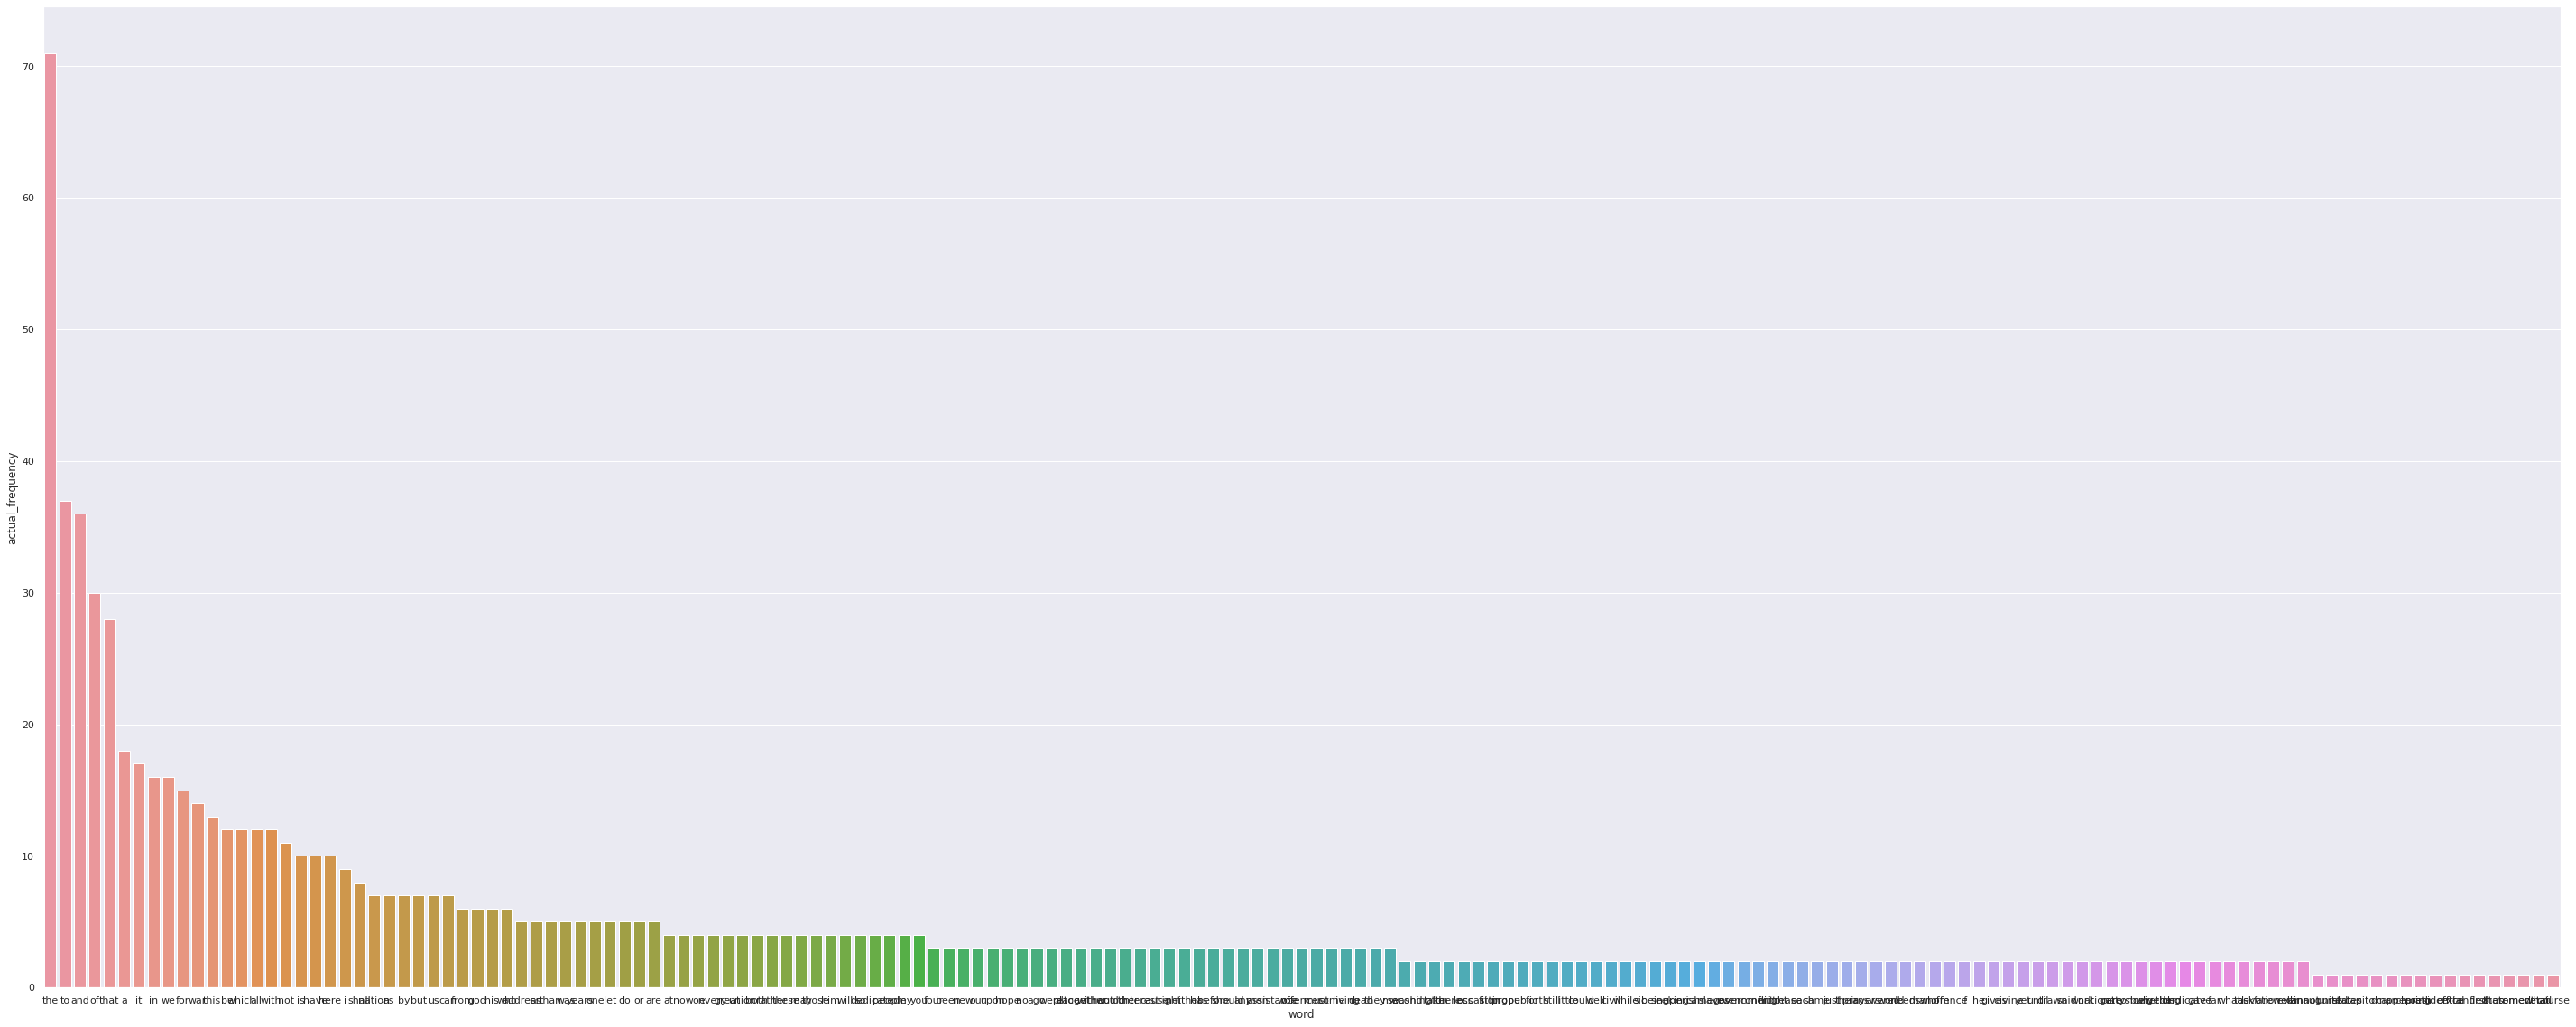

In [16]:
sns.barplot(x=df['word'], y=df['actual_frequency'])


> Gráfico de linha

<AxesSubplot:xlabel='word', ylabel='actual_frequency'>

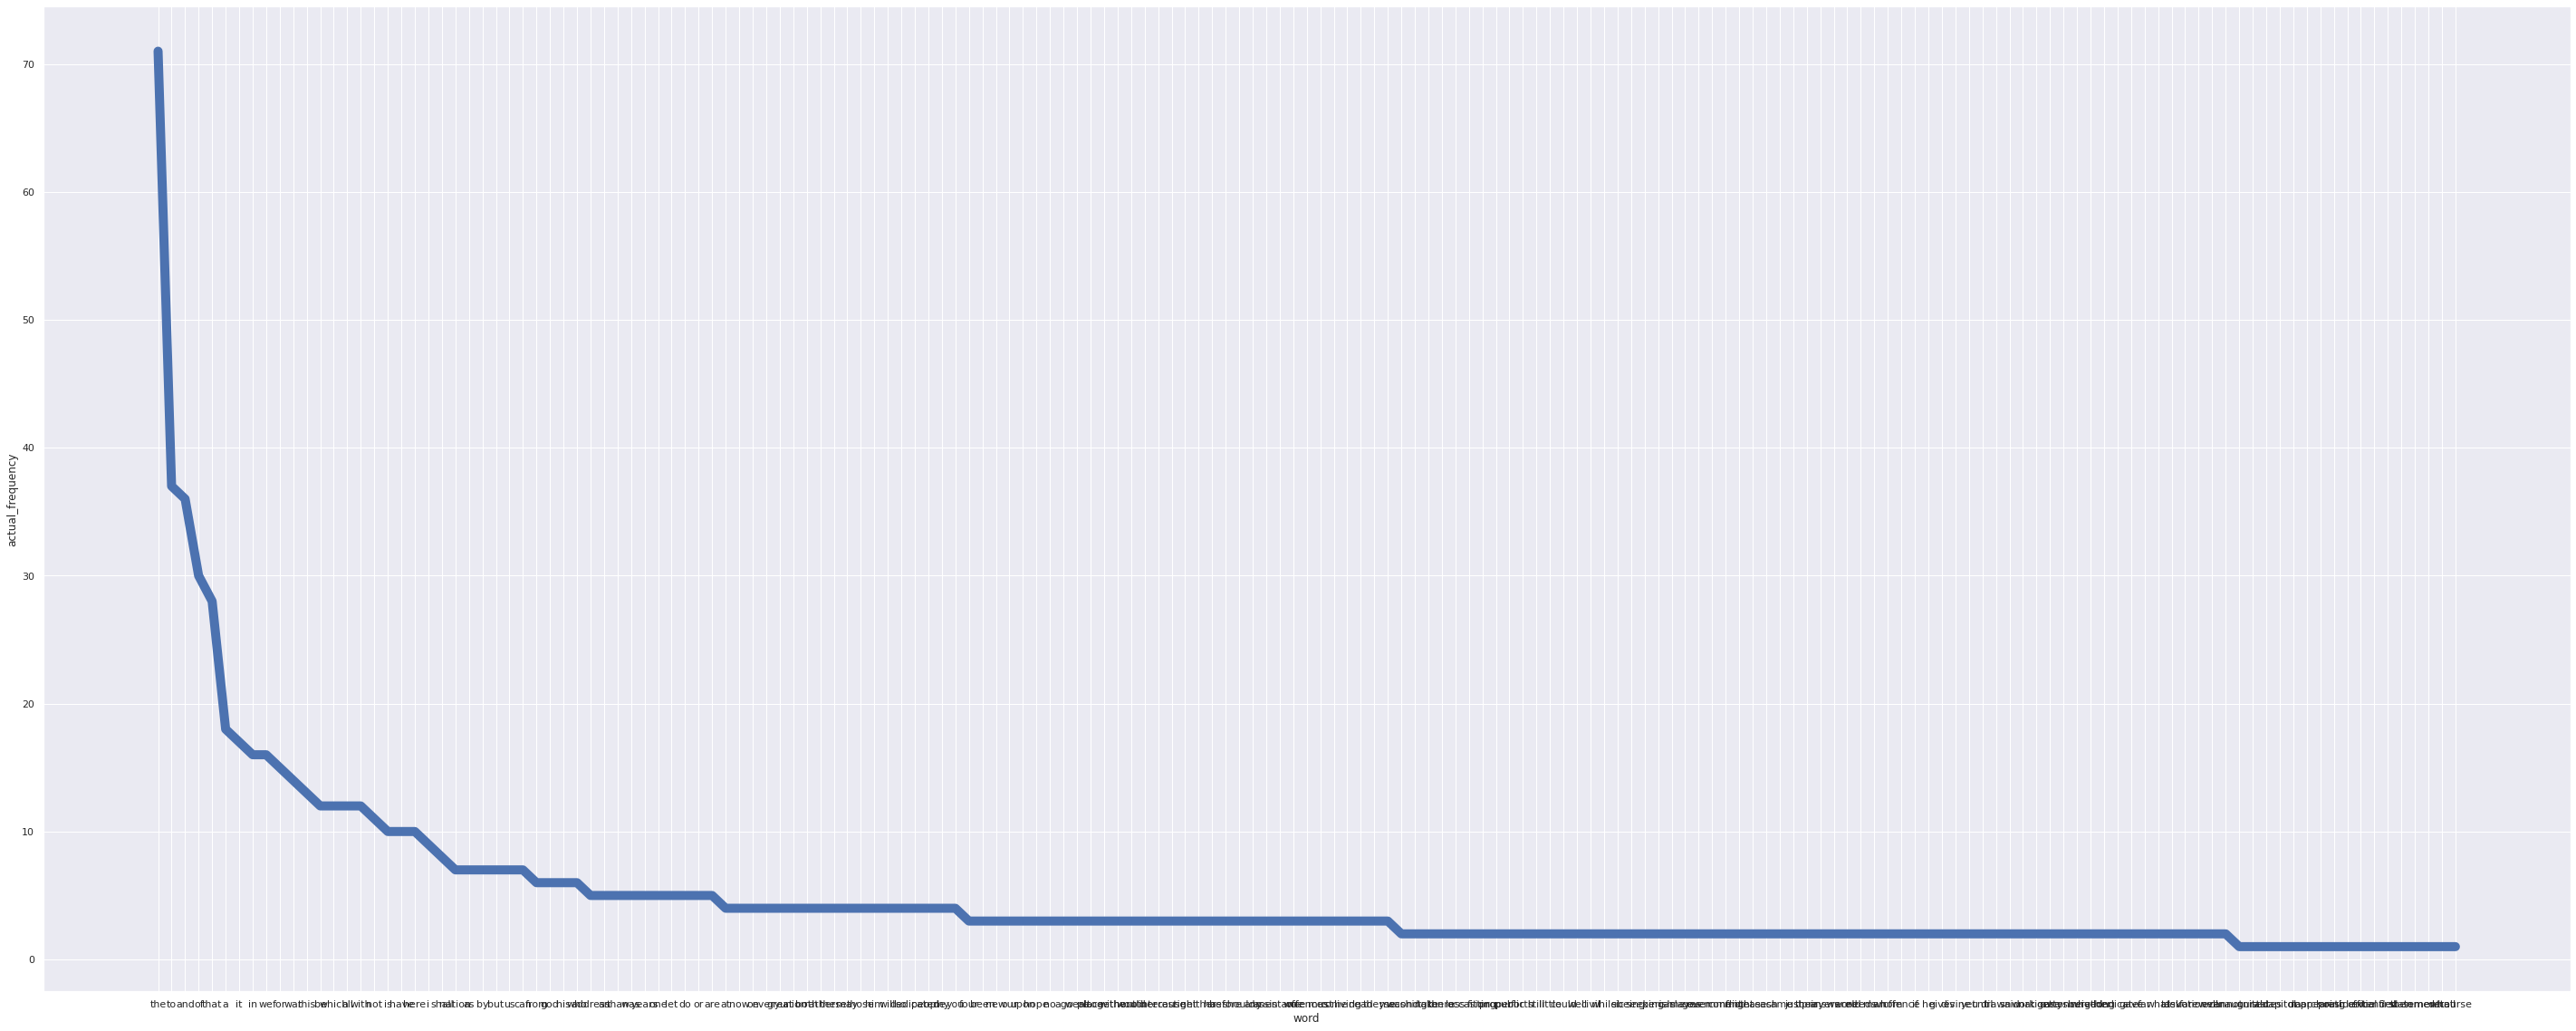

In [17]:
sns.lineplot(x="word", y="actual_frequency", data=df, lw=10)


> Gráfico de dispersão

<AxesSubplot:xlabel='word', ylabel='actual_frequency'>

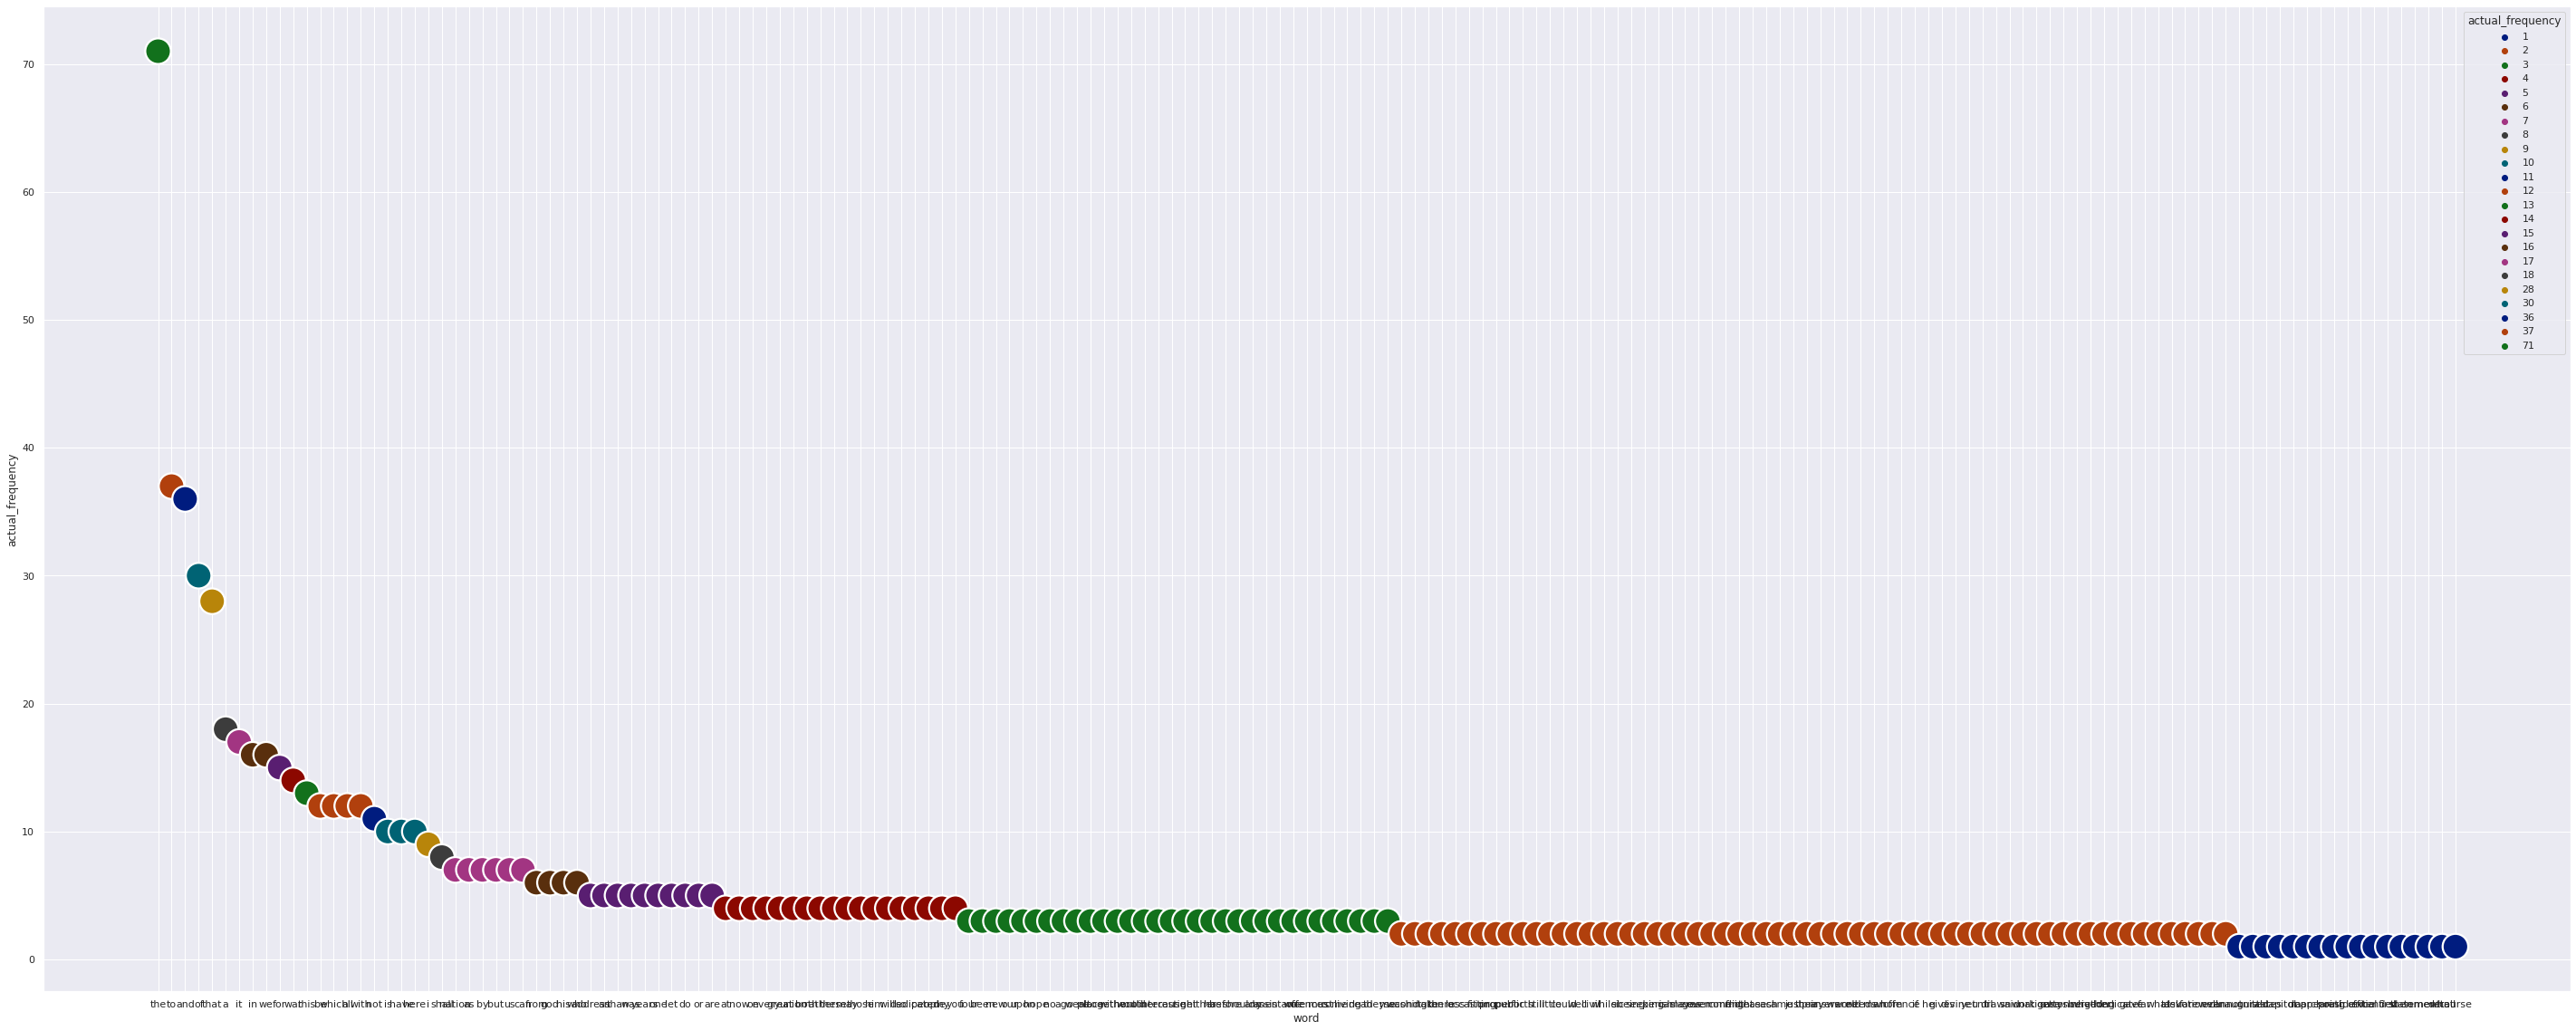

In [18]:
sns.scatterplot(x="word", y="actual_frequency", data=df, hue='actual_frequency', palette='dark', s=800)


## Conclusão


### Como podemos observar, Os discursos de Abraham Lincoln não geram totalmente o resultado esperado pela distribuição de Zipf - Na verdade, poucos textos individuais irão atingir este objetivo.

### Porém, com esta tarefa, foi atingido o objetivo de não somente entender na prática este conceito estatístico mas termos uma representação gráfica do mesmo para melhor entendimento